In [1]:
import os
import json

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import random

In [2]:
IMAGES_TRAIN = "../../text-to-image pytorch implementation/datasets/COCO/images/train2017/"
IMAGES_VAL = "../../text-to-image pytorch implementation/datasets/COCO/images/val2017/"
INSTAN_PATH_VAL = "../data/datasets/COCO/annotations/instances_val2014.json"

BBOX_PATH = "../evaluator_output/1/epochs/epoch16.json"
GRAPHS = "../data/datasets/AMR2014/Graph_test_amr_final_2014.json"

In [3]:
def draw_bounding_boxes(image_id, results, categories, resize=False, size=(256, 256), wh=True, center=False):
    try:
        picture = Image.open(IMAGES_TRAIN + "0" * (12 - len(str(image_id))) + str(image_id) + ".jpg")
    except:
        picture = Image.open(IMAGES_VAL + "0" * (12 - len(str(image_id))) + str(image_id) + ".jpg")
        
    fig, ax = plt.subplots(1, figsize=(15,15))
    ax.imshow(picture.resize(size), origin="upper")
    
    labels = []
    color = [
             "#FF0000","#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#0099FF", "#EB70AA", "#F0D58C", "#F4A460", "#FFD700", "#6495ED", "#000000", "#FFFFFF", 
             "#FF0000","#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#0099FF", "#EB70AA", "#F0D58C", "#F4A460", "#FFD700", "#6495ED", "#000000", "#FFFFFF",
             "#FF0000","#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#0099FF", "#EB70AA", "#F0D58C", "#F4A460", "#FFD700", "#6495ED", "#000000", "#FFFFFF"
            ]
    for k, result in enumerate(results):
        bbox, ls = result[:4], int(result[4])
        x, y, width, height = bbox
        if center:
            x = x - (width / 2)
            y = y - (height / 2)
            
        elif not wh:
            width = width - x
            height = height - y
            
        if resize:
            x*=size[0]
            y*=size[0]
            width*=size[0]
            height*=size[0]
        
        x = 0 if x < 0 else x
        y = 0 if y < 0 else y
        width = 256 if width > 256 else width
        height = 256 if height > 256 else height
        rect = patches.Rectangle((x, y),width, height, linewidth=3, edgecolor=color[k], facecolor='none')
        ax.add_patch(rect)
        labels.append(categories[ls])
        
    plt.legend(labels)
    plt.show()

In [4]:
with open(BBOX_PATH, "r") as json_file:
    data = json.load(json_file)

In [5]:
with open(INSTAN_PATH_VAL, "r") as json_file:
    coco = json.load(json_file)

In [6]:
image_id_to_size = {}
for object_data in coco['images']:
    image_id = str(object_data['id'])
    image_id_to_size[image_id] = (object_data['width'], object_data['height'])

In [7]:
objects = {}
for object_data in coco['annotations']:
    image_id = str(object_data['image_id'])
    if image_id == "262284":
        print("existo")
    bbox = object_data['bbox']
    WW, HH = image_id_to_size[image_id]
    bbox[0] = bbox[0] / WW * 256
    bbox[1] = bbox[1] / HH * 256
    bbox[2] = bbox[2] / WW * 256
    bbox[3] = bbox[3] / HH * 256
    
    if image_id in objects:
        objects[image_id].append(bbox+[object_data['category_id']])
    else:
        objects[image_id] = [bbox+[object_data['category_id']]] 

In [8]:
category_to_name = {}
for object_data in coco['categories']:
    category_to_name[object_data['id']] = object_data['name']

In [9]:
data.keys()

dict_keys(['391895-0', '391895-1', '391895-2', '391895-3', '391895-4', '522418-0', '522418-1', '522418-2', '522418-3', '522418-4', '184613-0', '184613-1', '184613-2', '184613-3', '184613-4', '318219-0', '318219-1', '318219-2', '318219-3', '318219-4', '554625-0', '554625-1', '554625-2', '554625-3', '554625-4', '397133-0', '397133-1', '397133-2', '397133-3', '397133-4', '574769-0', '574769-1', '574769-2', '574769-3', '574769-4', '60623-0', '60623-1', '60623-2', '60623-3', '60623-4', '309022-0', '309022-1', '309022-2', '309022-3', '309022-4', '5802-0', '5802-1', '5802-2', '5802-3', '5802-4', '222564-0', '222564-1', '222564-2', '222564-3', '222564-4', '118113-0', '118113-1', '118113-2', '118113-3', '118113-4', '193271-0', '193271-1', '193271-2', '193271-3', '193271-4', '224736-0', '224736-1', '224736-2', '224736-3', '224736-4', '483108-0', '483108-1', '483108-2', '483108-3', '483108-4', '403013-0', '403013-1', '403013-2', '403013-3', '403013-4', '374628-0', '374628-1', '374628-2', '374628-

In [10]:
with open(GRAPHS, "r") as json_file:
    graphs = json.load(json_file)

In [11]:
def generate_picture(key):
    image_id = key.split("-")[0]
    draw_bounding_boxes(image_id, data[key], category_to_name, resize=True, wh=True, center=True)
    draw_bounding_boxes(image_id, objects[image_id], category_to_name)

In [12]:
pictures_to_check1 = [random.choice(list(data.keys())) for i in range(100)]

In [13]:
print(pictures_to_check1)

['366679-1', '482526-2', '62353-1', '375980-1', '262347-3', '185614-3', '421915-0', '401411-1', '51040-3', '516813-2', '188311-1', '410278-2', '434513-4', '268412-3', '363654-0', '391774-0', '28071-0', '118846-4', '81505-1', '398884-1', '537631-0', '543672-1', '449031-2', '416596-0', '211108-2', '354368-4', '189773-0', '152340-1', '540193-3', '559550-4', '120792-3', '94405-1', '390134-3', '355575-0', '225670-0', '16377-3', '368679-2', '21310-4', '86125-0', '26802-4', '289474-2', '425324-2', '152214-3', '220367-1', '356351-2', '50443-0', '348379-4', '302318-3', '484816-1', '288599-3', '219965-3', '360629-3', '511294-2', '396217-2', '399966-2', '202199-2', '327436-4', '505243-3', '271063-3', '536168-2', '295426-2', '4749-0', '528200-4', '128813-0', '99114-3', '294124-1', '299295-4', '283216-1', '97767-2', '422328-0', '271785-3', '425136-0', '67042-1', '445505-0', '314182-2', '569273-2', '512194-3', '1739-4', '300903-0', '57812-4', '545903-2', '184951-0', '358120-1', '505619-3', '387429-0

Caption: a train on the railroad near a forested area
Triples: [[['near-02', 0], ':ARG1', ['train', 1]], [['near-02', 0], ':ARG2', ['area', 2]], [['forested', 3], ':ARG1', ['area', 2]], [['train', 1], ':location', ['railroad', 4]]]
Original objects:  ['train']
Predicted objects:  ['train']


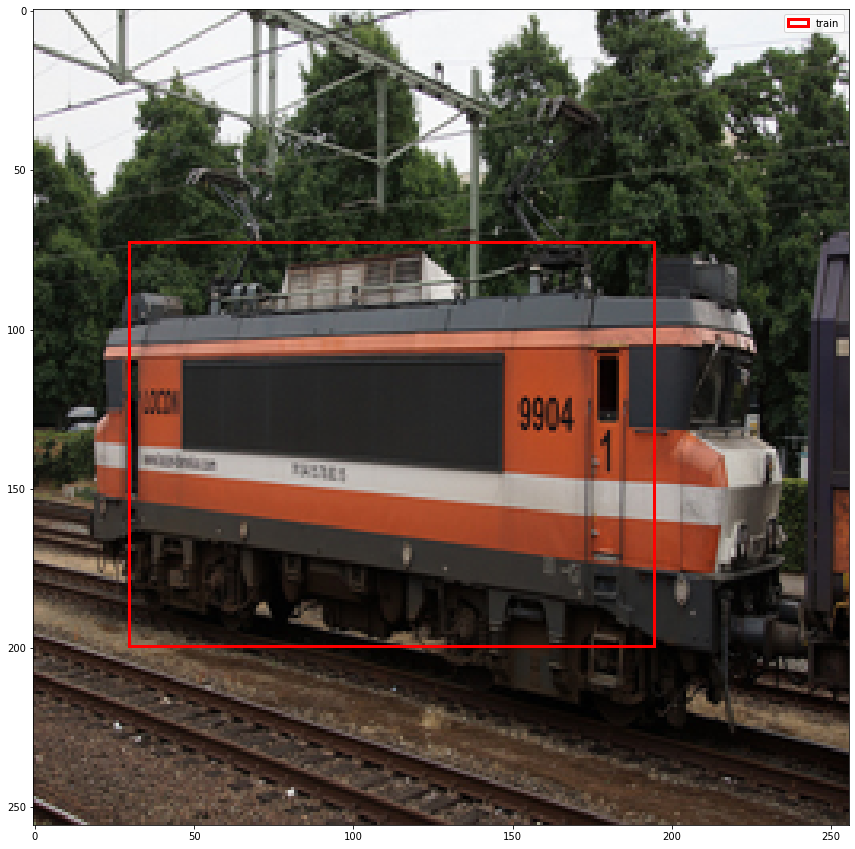

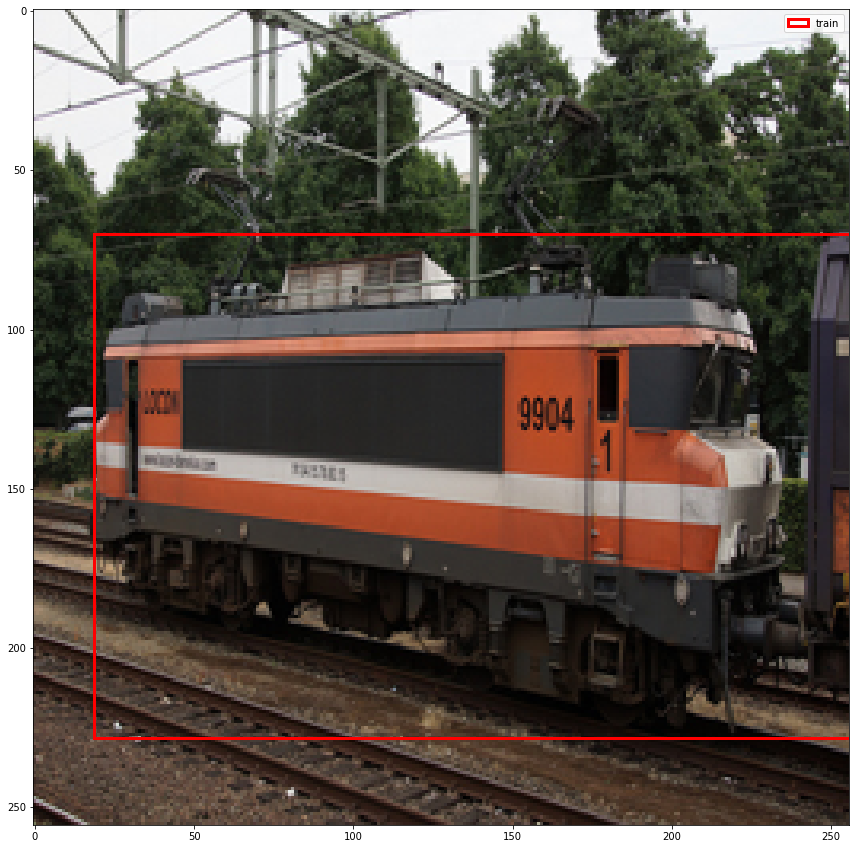


Caption: A small bathroom with tiles appears clean and organized.
Triples: [[['appear-02', 0], ':ARG1', ['and', 1]], [['and', 1], ':op1', ['clean-04', 2]], [['clean-04', 2], ':ARG1', ['bathroom', 3]], [['bathroom', 3], ':mod', ['small', 4]], [['bathroom', 3], ':prep-with', ['tile-01', 5]], [['and', 1], ':op2', ['organize-01', 6]], [['organize-01', 6], ':ARG1', ['bathroom', 3]]]
Original objects:  ['potted plant', 'toilet']
Predicted objects:  ['toilet', 'sink']


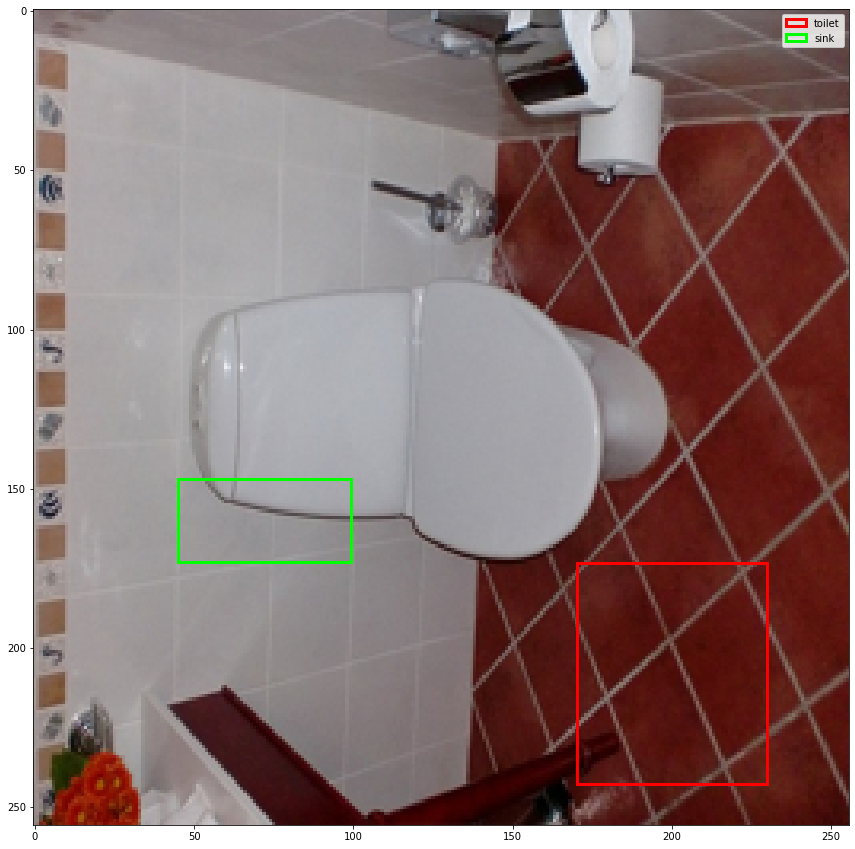

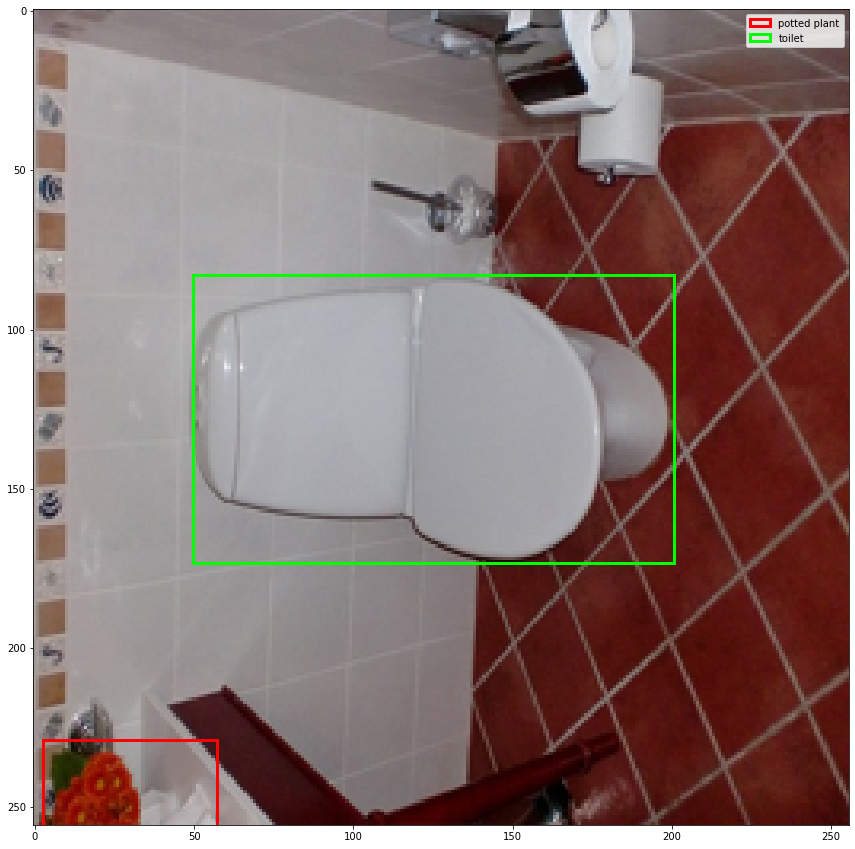


Caption: there is a baseball game on and many people watching it
Triples: [[['and', 0], ':op1', ['game', 1]], [['game', 1], ':domain', ['it', 2]], [['game', 1], ':mod', ['baseball', 3]], [['and', 0], ':op2', ['watch-01', 4]], [['watch-01', 4], ':ARG0', ['person', 5]], [['person', 5], ':domain', ['game', 1]], [['person', 5], ':quant', ['many', 6]]]
Original objects:  ['baseball bat', 'baseball bat', 'baseball glove', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person']
Predicted objects:  ['person', 'person']


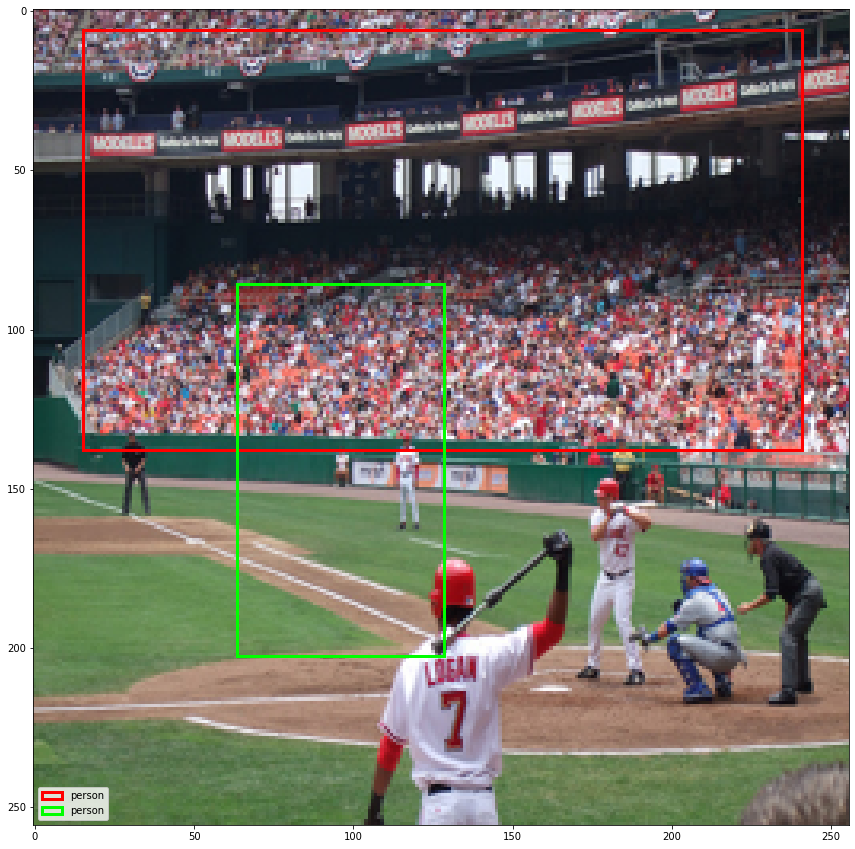

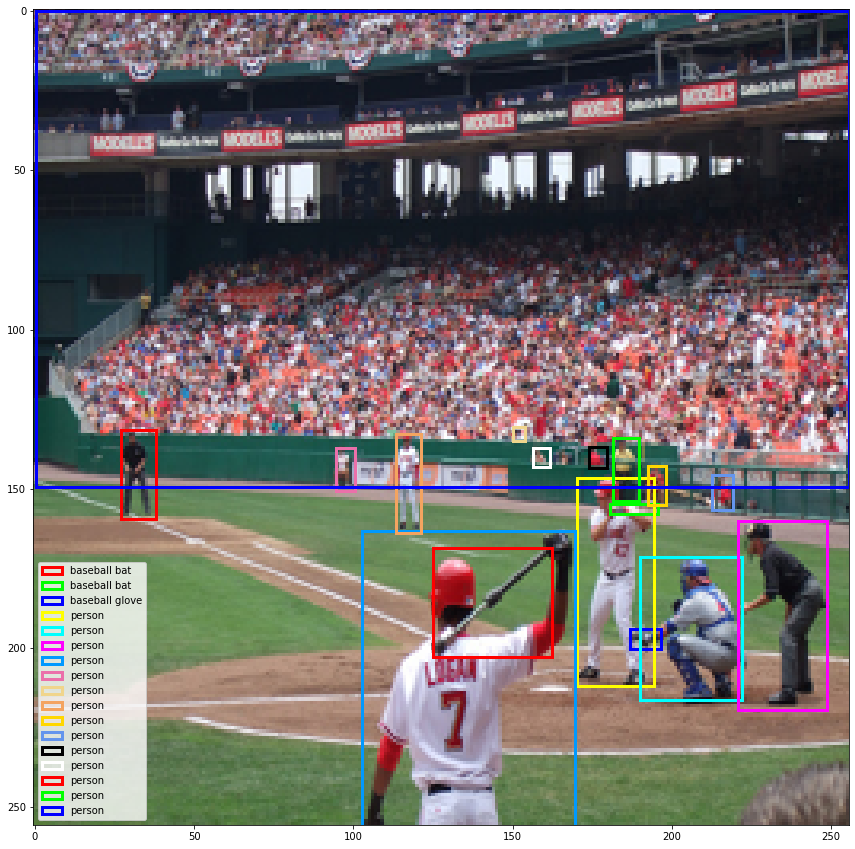


Caption: Two toilets sit outside on the pavement next to a yard with many decorations.
Triples: [[['sit-01', 0], ':ARG1', ['toilet', 1]], [['toilet', 1], ':quant', ['next-to', 2]], [['next-to', 2], ':op1', ['yard', 3]], [['decorate-01', 4], ':consist', ['yard', 3]], [['decorate-01', 4], ':quant', ['many', 5]], [['sit-01', 0], ':ARG2', ['outside', 6]], [['sit-01', 0], ':location', ['pavement', 7]]]
Original objects:  ['potted plant', 'potted plant', 'potted plant', 'toilet', 'toilet', 'potted plant', 'potted plant']
Predicted objects:  ['toilet', 'toilet']


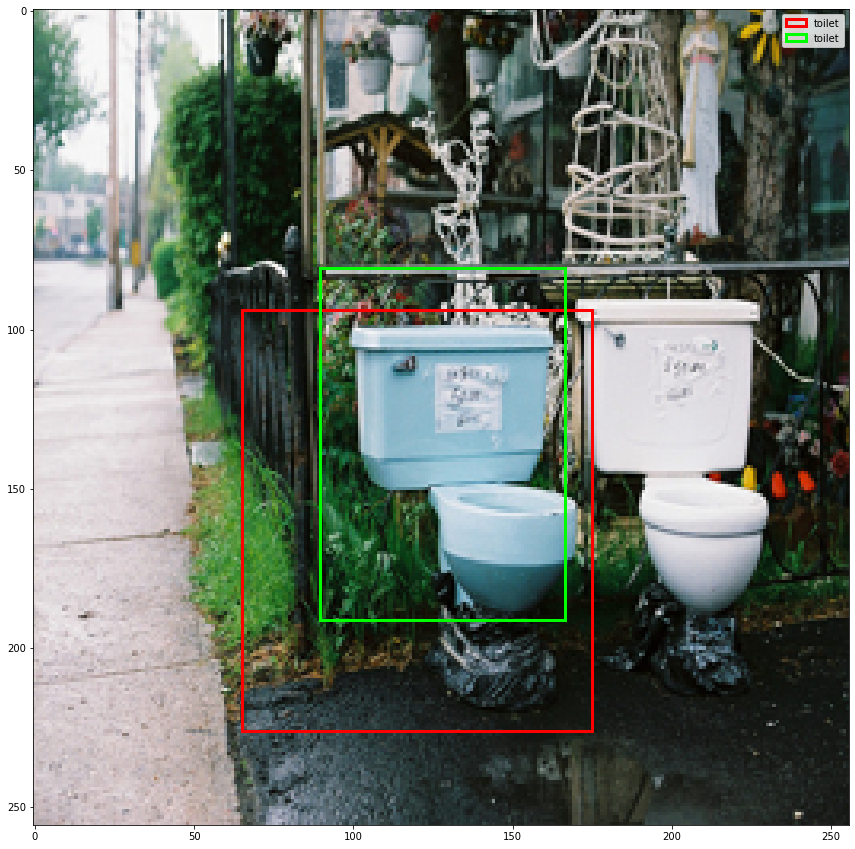

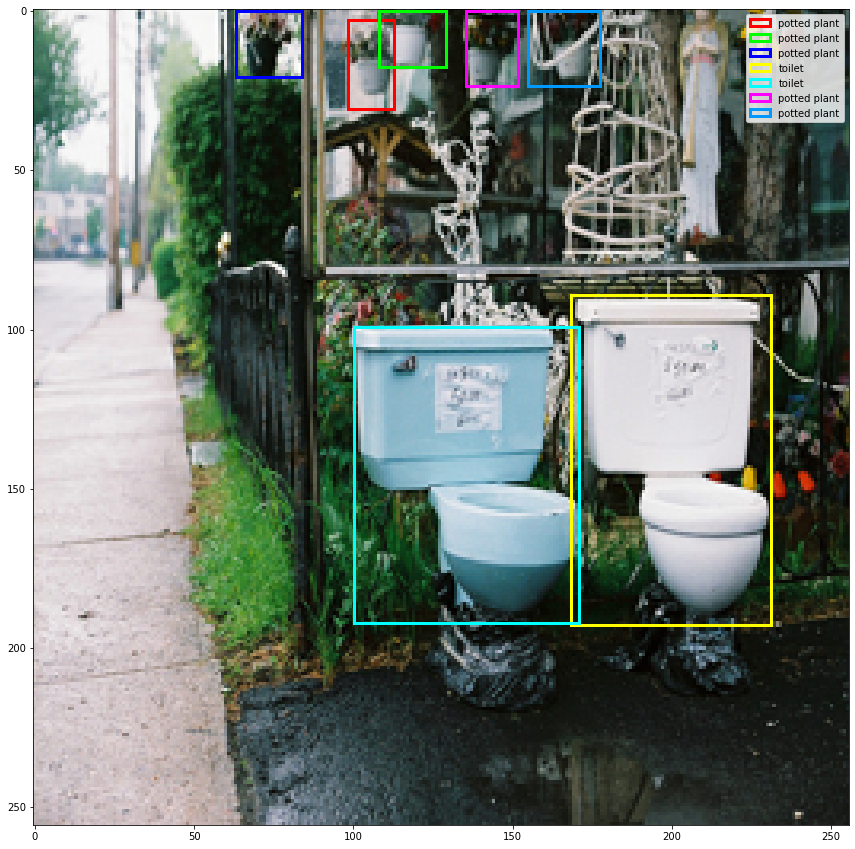


Caption: A little boy and girl playing with a interactive video game.
Triples: [[['play-01', 0], ':ARG0', ['and', 1]], [['and', 1], ':op1', ['boy', 2]], [['boy', 2], ':mod', ['little', 3]], [['and', 1], ':op2', ['girl', 4]], [['play-01', 0], ':ARG2', ['game', 5]], [['game', 5], ':mod', ['interactive', 6]], [['game', 5], ':mod', ['video', 7]]]
Original objects:  ['bottle', 'bottle', 'couch', 'chair', 'person', 'remote', 'person', 'bottle', 'bottle', 'person']
Predicted objects:  ['person', 'person', 'couch', 'remote', 'remote']


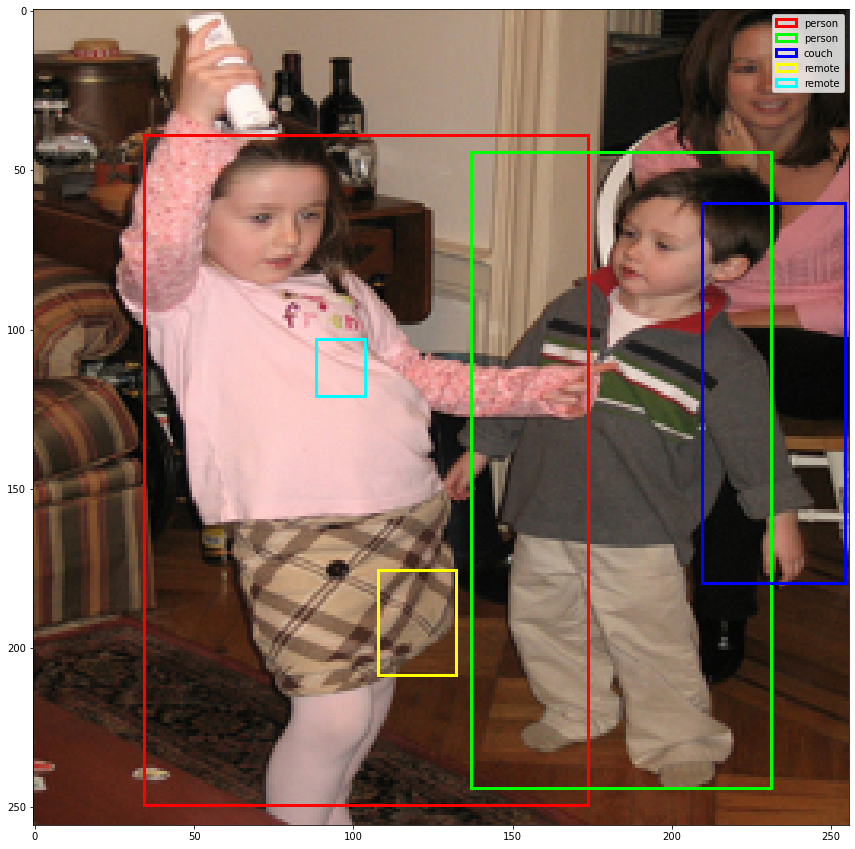

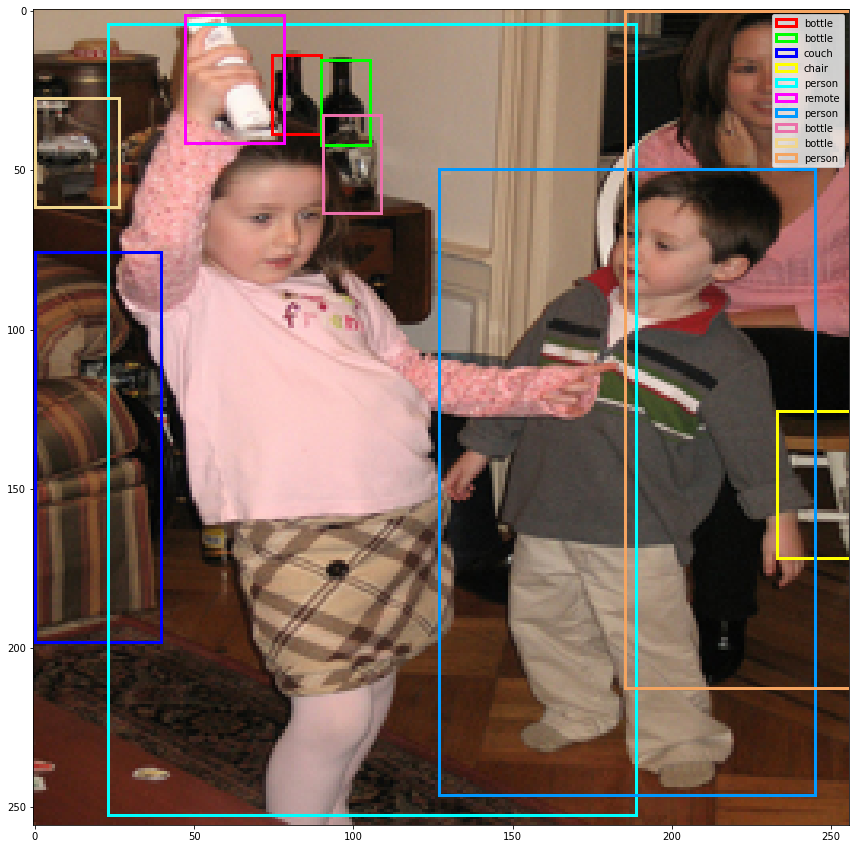

In [18]:
pictures_to_check1 = [random.choice(list(data.keys())) for i in range(5)]
for key in pictures_to_check1:
    try:
        image_id, cap = key.split("-")
        print("Caption:", graphs[image_id]['graphs'][int(cap)]['caption'][:-1],)
        print("Triples:", graphs[image_id]['graphs'][int(cap)]['triples'])
        print("Original objects: ", [category_to_name[object_info[-1]] for object_info in objects[image_id]])
        print("Predicted objects: ", [category_to_name[object_info[-1]] for object_info in data[key]])
        generate_picture(key)
        print("")
    except:
        print("Original objects: ", [category_to_name[object_info[-1]] for object_info in objects[key]])
        print("Predicted objects: ", [category_to_name[object_info[-1]] for object_info in data[key]])
        generate_picture(key)

In [15]:
pictures_to_check2 = [
    '12543-4', '23411-2', '327029-2', '501762-1', '527979-1', 
    '107853-3', '138095-1', '170227-2', '442345-2', '498082-1']

In [ ]:
pictures_to_check2 = [
    '12543', '23411', '327029', '501762', '527979', 
    '107853', '138095', '170227', '442345', '498082']

Caption: A child flies a kite with another child onlooking.
Triples: [[['fly-01', 0], ':ARG0', ['child', 1]], [['fly-01', 0], ':ARG1', ['kite', 2]], [['fly-01', 0], ':accompanier', ['onlooking', 3]], [['onlooking', 3], ':mod', ['another', 4]]]
Original objects:  ['person', 'person', 'person', 'kite']
Predicted objects:  ['person', 'kite']


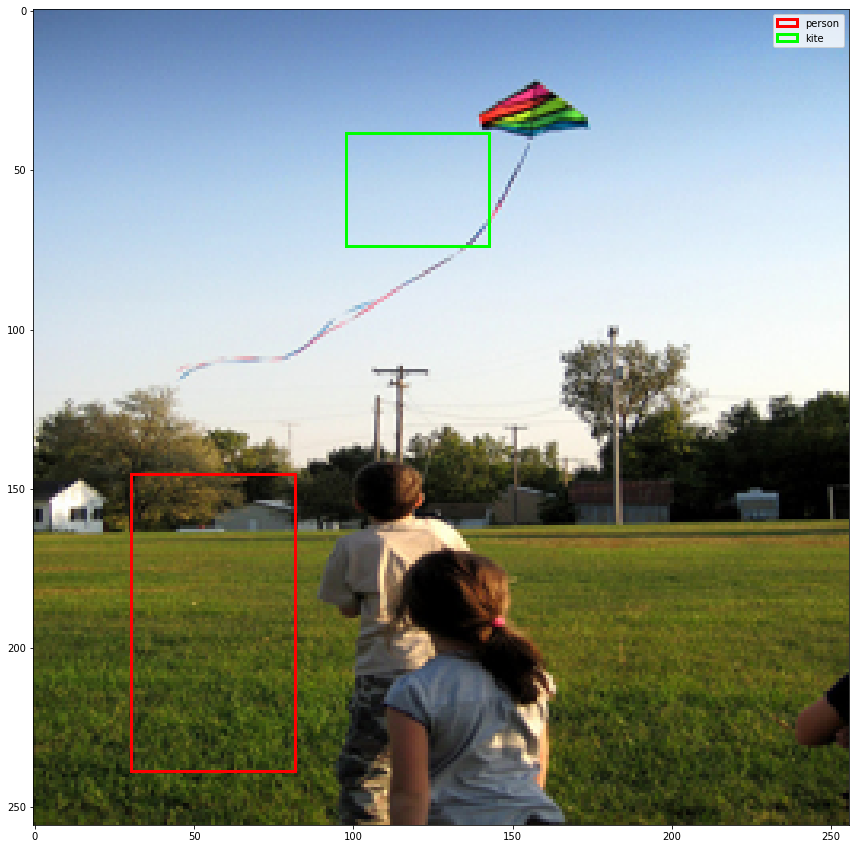

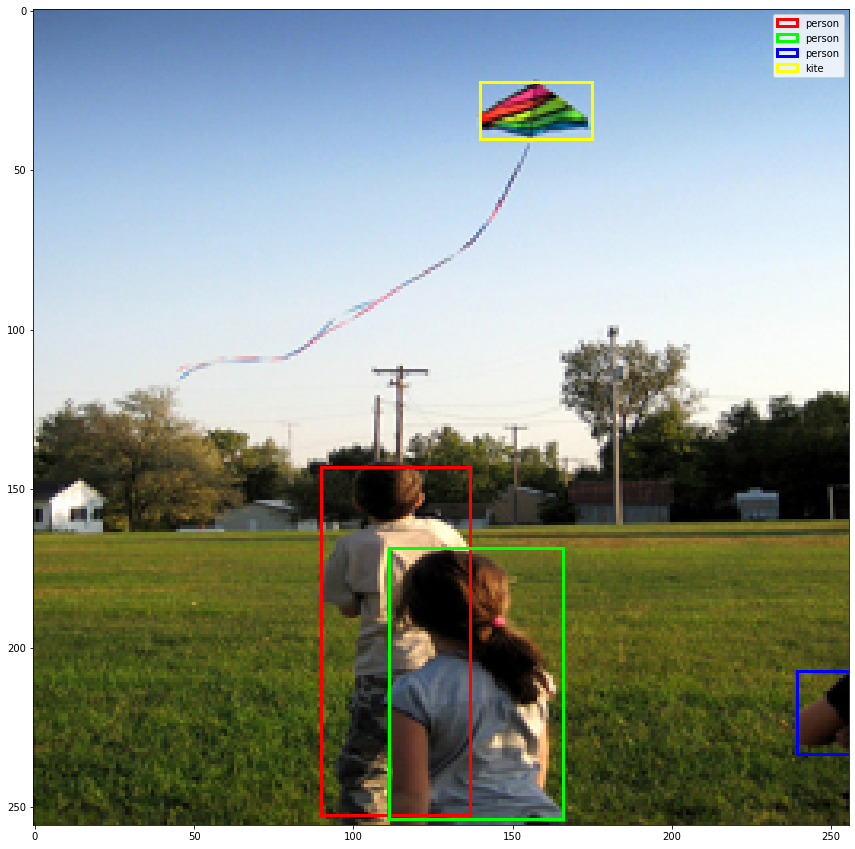


Caption: The baby zebra is standing near it's mother.
Triples: [[['stand-01', 0], ':ARG1', ['zebra', 1]], [['have-rel-role-91', 2], ':ARG1', ['zebra', 1]], [['have-rel-role-91', 2], ':ARG0', ['person', 3]], [['have-rel-role-91', 2], ':ARG2', ['mother', 4]], [['zebra', 1], ':mod', ['baby', 5]], [['near-02', 6], ':ARG1', ['stand-01', 0]], [['near-02', 6], ':ARG2', ['person', 3]]]
Original objects:  ['zebra', 'zebra', 'zebra']
Predicted objects:  ['zebra', 'zebra']


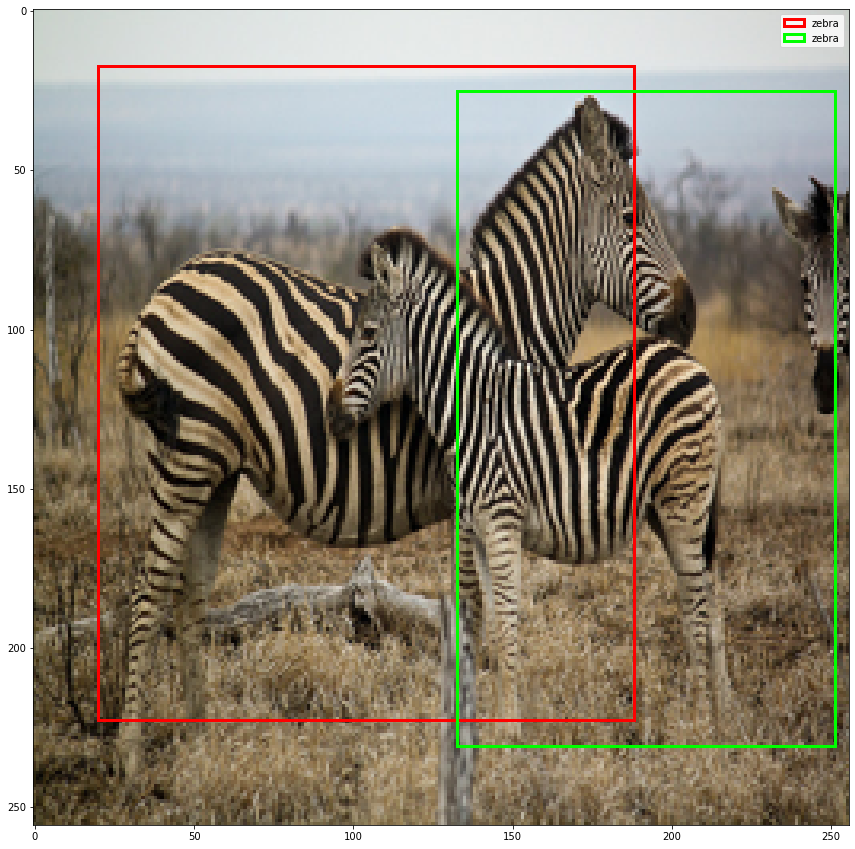

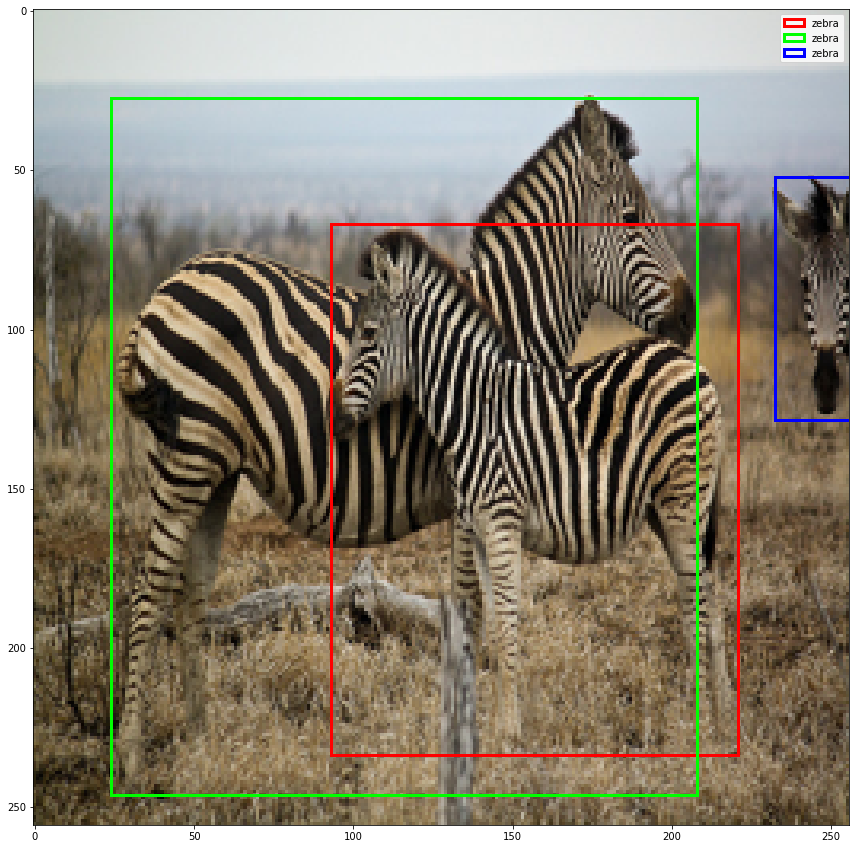


Caption: A guy playing frisbee at the beach at sunset.
Triples: [[['play-01', 0], ':ARG0', ['guy', 1]], [['play-01', 0], ':ARG1', ['frisbee', 2]], [['play-01', 0], ':location', ['beach', 3]], [['play-01', 0], ':time', ['sunset', 4]]]
Original objects:  ['person', 'frisbee']
Predicted objects:  ['person', 'frisbee']


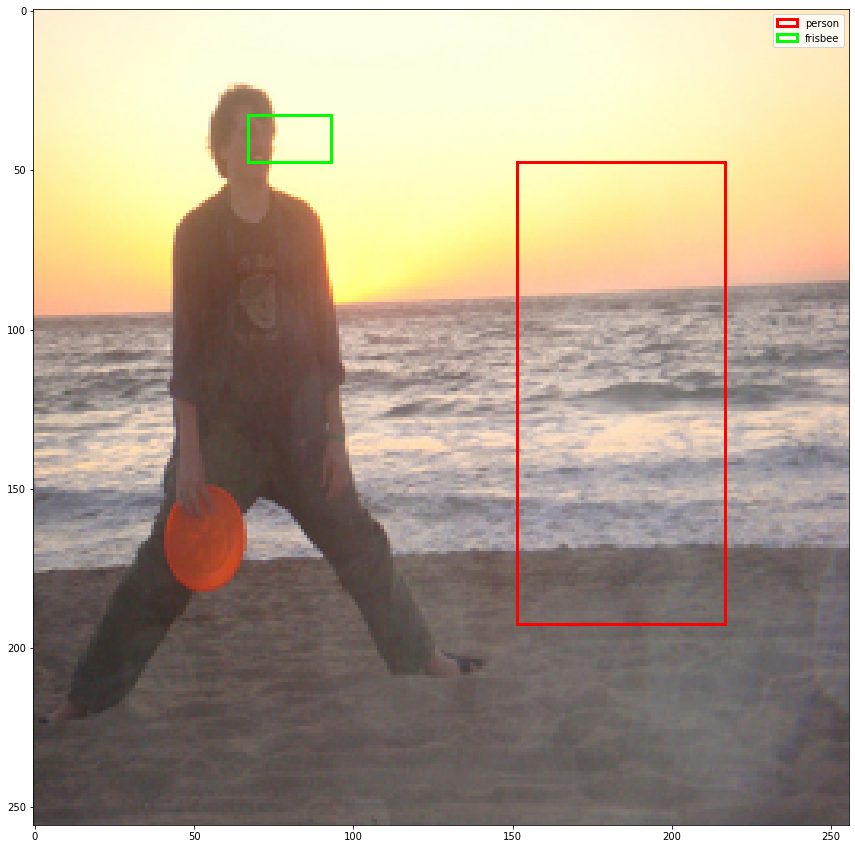

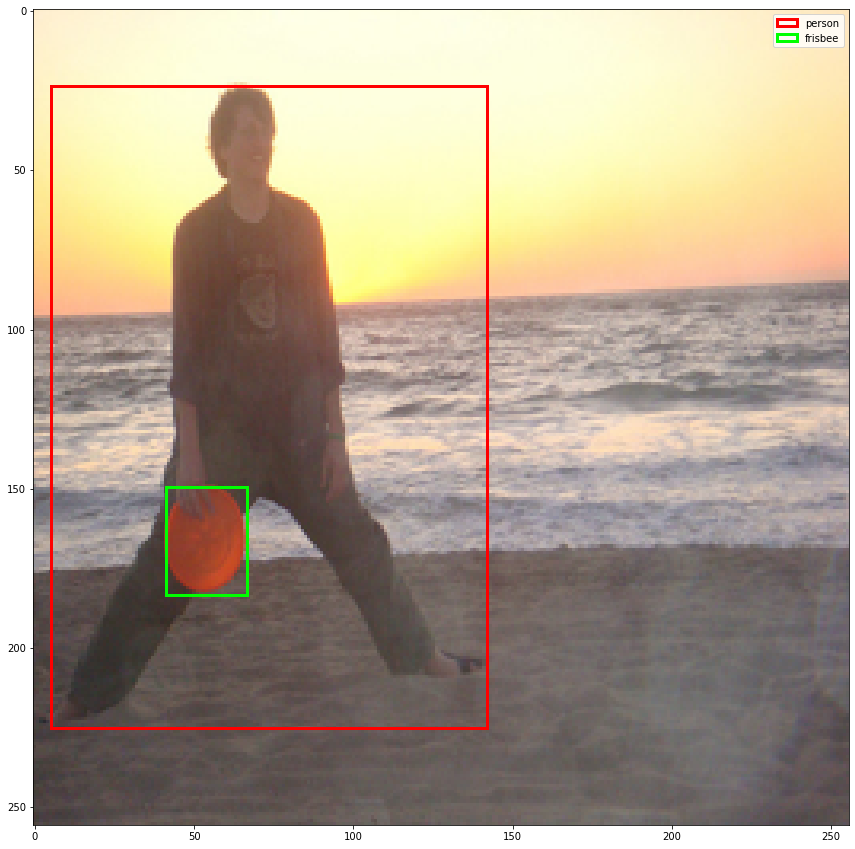


Caption: A young person on a skate board in the air near a rail.
Triples: [[['person', 0], ':location', ['be-located-at-91', 1]], [['be-located-at-91', 1], ':ARG2', ['near-02', 2]], [['near-02', 2], ':ARG2', ['rail', 3]], [['be-located-at-91', 1], ':ARG2', ['air', 4]], [['person', 0], ':location', ['board', 5]], [['board', 5], ':purpose', ['skate-01', 6]], [['person', 0], ':mod', ['young', 7]]]
Original objects:  ['person', 'skateboard']
Predicted objects:  ['person', 'skateboard']


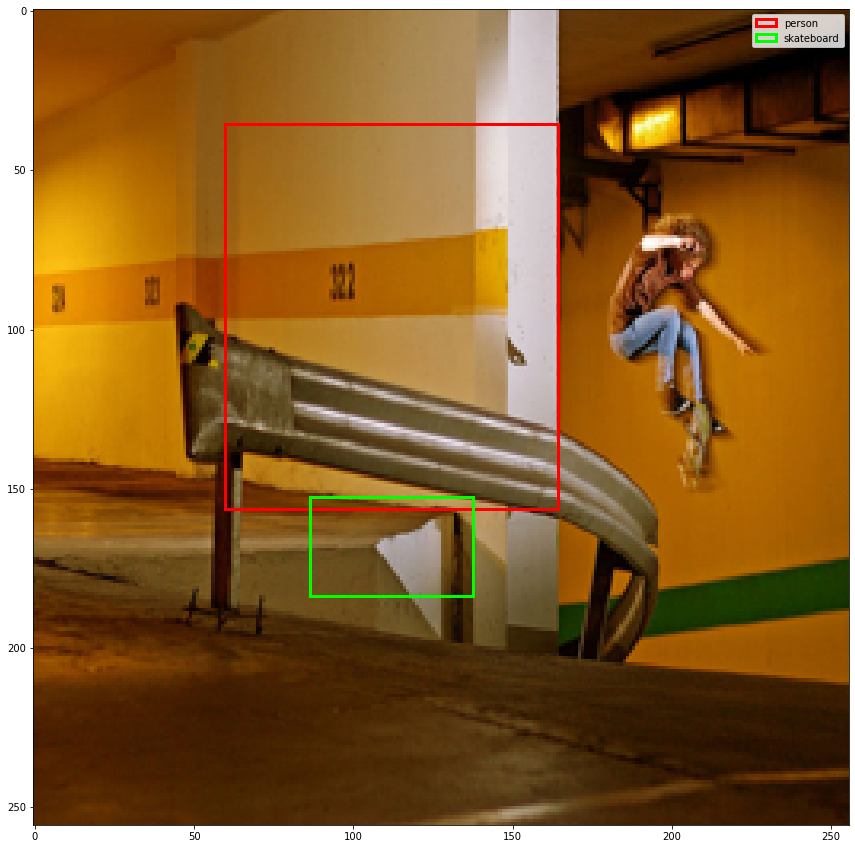

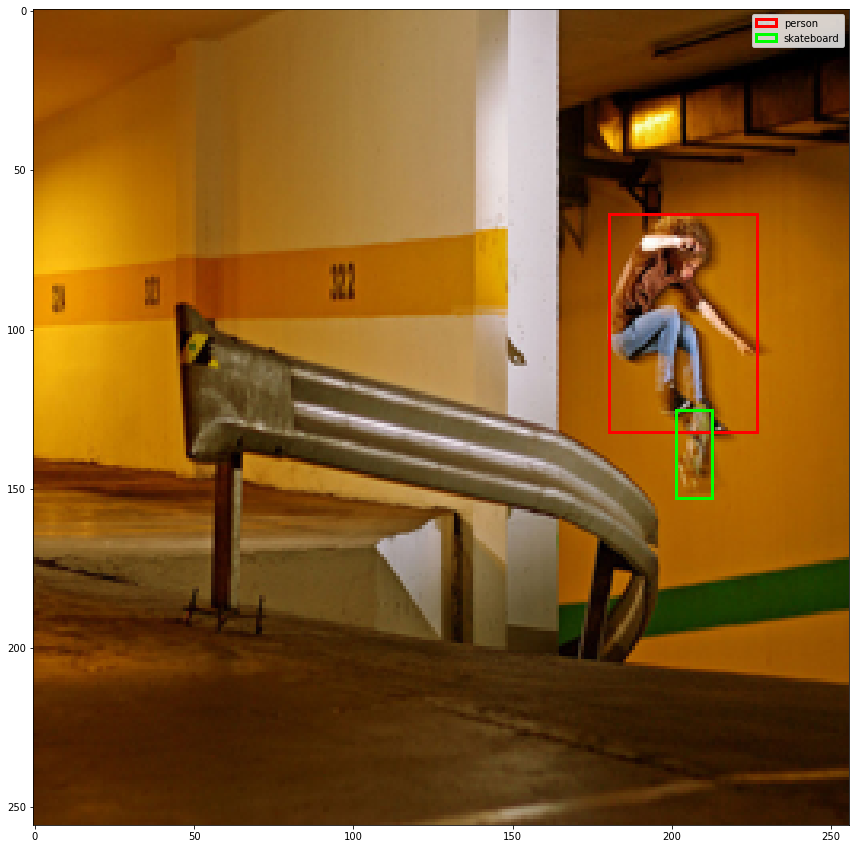


Caption:  A couple of giraffe eating food from a persons hand.
Triples: [[['eat-01', 0], ':ARG0', ['giraffe', 1]], [['giraffe', 1], ':quant', ['couple', 2]], [['eat-01', 0], ':ARG1', ['food', 3]], [['eat-01', 0], ':source', ['hand', 4]], [['person', 5], ':part', ['hand', 4]]]
Original objects:  ['person', 'giraffe', 'giraffe', 'car']
Predicted objects:  ['giraffe', 'giraffe', 'person']


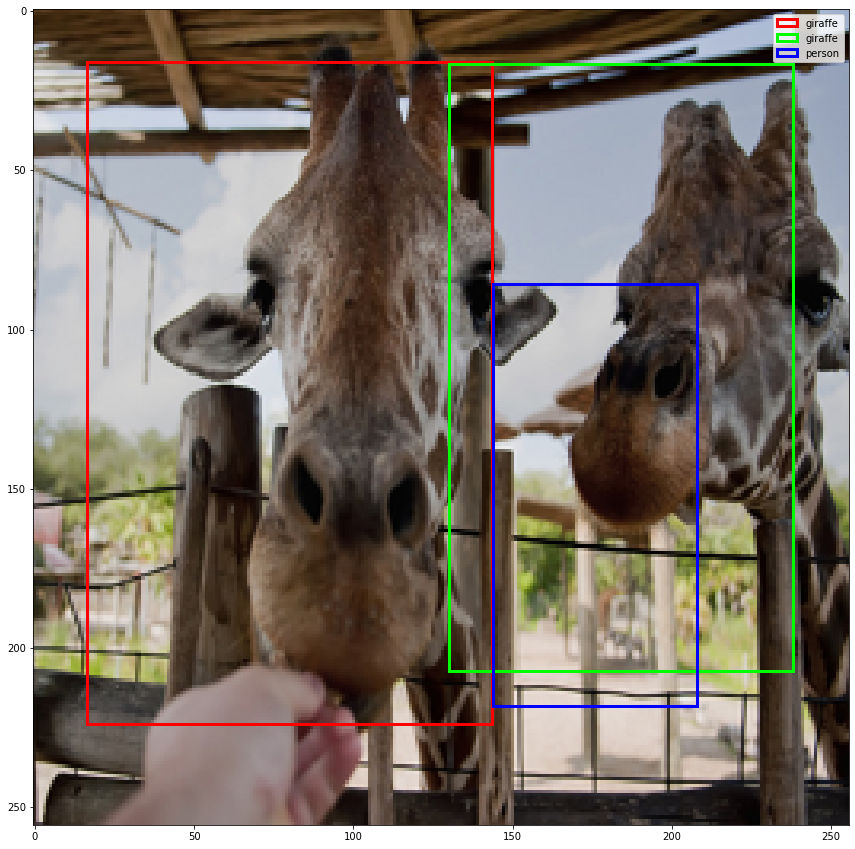

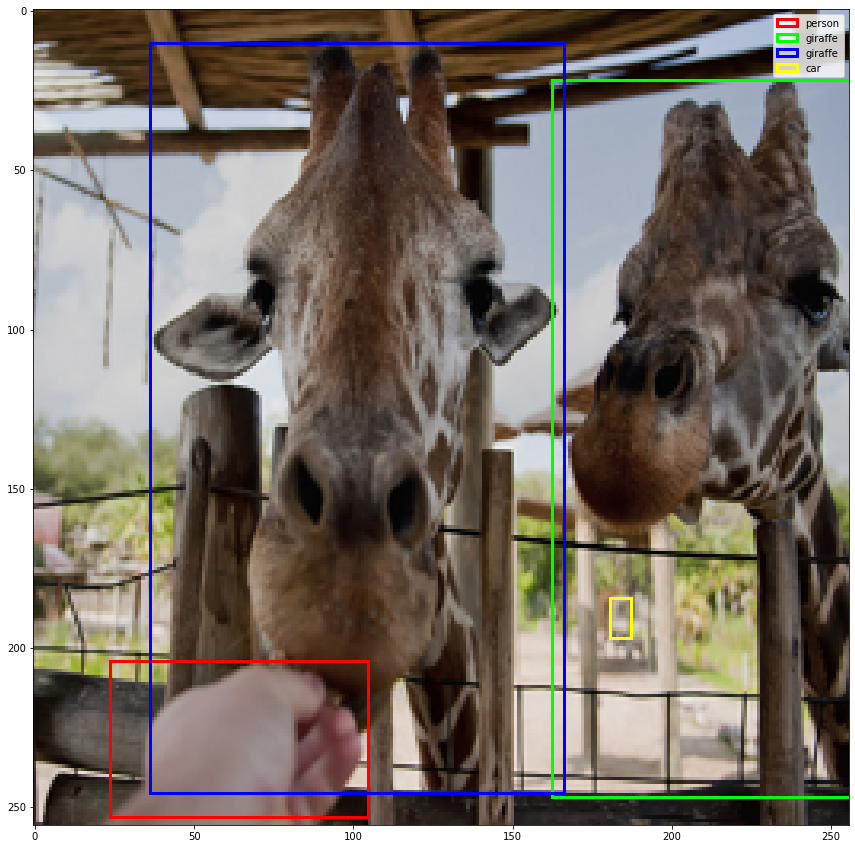

In [16]:
for key in pictures_to_check2:
    try:
        image_id, cap = key.split("-")
        try:
            print("Caption:", graphs[image_id]['graphs'][int(cap)]['caption'][:-1])
            print("Triples:", graphs[image_id]['graphs'][int(cap)]['triples'])
            print("Original objects: ", [category_to_name[object_info[-1]] for object_info in objects[image_id]])
            print("Predicted objects: ", [category_to_name[object_info[-1]] for object_info in data[key]])
            generate_picture(key)
            print("")
        except:
            pass
            # print("Error:", image_id)
    except:
        try:
            print("Original objects: ", [category_to_name[object_info[-1]] for object_info in objects[key]])
            print("Predicted objects: ", [category_to_name[object_info[-1]] for object_info in data[key]])
            generate_picture(key)
            print("")
        except:
            pass